## 信用卡信用狀況

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# 讀取數據
data = pd.read_csv('UCI_Credit_Card.csv')

# 定義特徵和目標變數, 主要是移除目標變數default.payment.next.month與ID
features = data.drop(['default.payment.next.month','ID'], axis=1)  
X = features
y = data['default.payment.next.month']            # 設定目標變數

In [3]:
# 將數據分割為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y,
                          test_size=0.2, random_state=10)


In [4]:
# 特徵縮放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# 創建並訓練邏輯迴歸模型
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
# 獲取特徵重要性 - 對於邏輯迴歸模型，用查看模型係數來判斷特徵的重要性
importance = model.coef_[0]

# 總結特徵重要性
for i, score in enumerate(importance):
    print(f'特徵: {features.columns[i]:10s}, 分數: {score:.5f}')


特徵: LIMIT_BAL , 分數: -0.09251
特徵: SEX       , 分數: -0.05675
特徵: EDUCATION , 分數: -0.07002
特徵: MARRIAGE  , 分數: -0.08346
特徵: AGE       , 分數: 0.06998
特徵: PAY_0     , 分數: 0.63988
特徵: PAY_2     , 分數: 0.10731
特徵: PAY_3     , 分數: 0.09626
特徵: PAY_4     , 分數: 0.01599
特徵: PAY_5     , 分數: 0.03251
特徵: PAY_6     , 分數: 0.02136
特徵: BILL_AMT1 , 分數: -0.41557
特徵: BILL_AMT2 , 分數: 0.20846
特徵: BILL_AMT3 , 分數: 0.08524
特徵: BILL_AMT4 , 分數: 0.03273
特徵: BILL_AMT5 , 分數: -0.05235
特徵: BILL_AMT6 , 分數: 0.04633
特徵: PAY_AMT1  , 分數: -0.24341
特徵: PAY_AMT2  , 分數: -0.19772
特徵: PAY_AMT3  , 分數: -0.05722
特徵: PAY_AMT4  , 分數: -0.07154
特徵: PAY_AMT5  , 分數: -0.04787
特徵: PAY_AMT6  , 分數: -0.02067


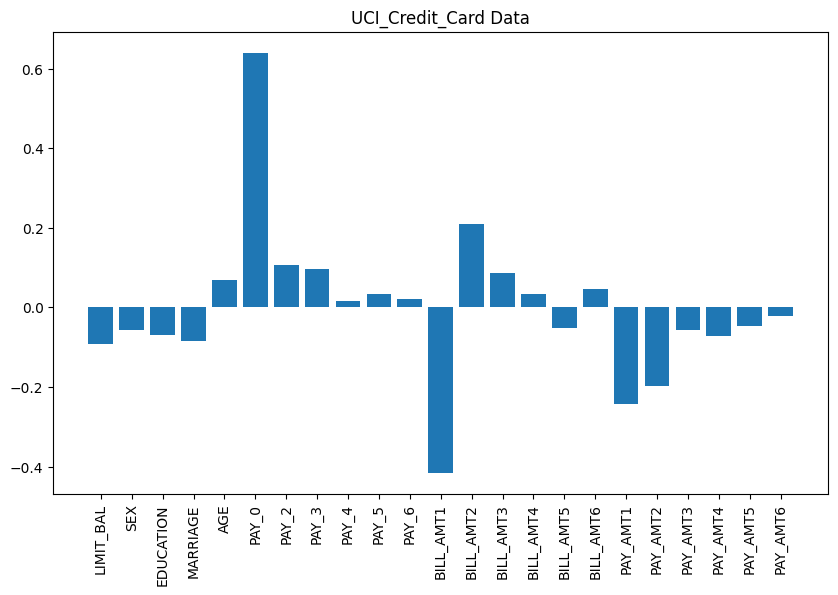

In [7]:
# 繪製特徵重要性
plt.figure(figsize=(10, 6))                         # 設置圖表大小
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],
           features.columns, rotation='vertical')   # 在X軸上加上特徵名稱
plt.title('UCI_Credit_Card Data')
plt.show()